# CIFAR100 - Categorical Classification
> # Convolutional Neural Network

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import Tensorflow

In [2]:
import tensorflow

tensorflow.__version__

'2.5.0'

# I. CIFAR100 Data_Set Load

In [3]:
from tensorflow.keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode = 'fine')

169009152/169001437 [==============================] - 4s 0us/step


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [4]:
X_train = X_train.reshape((50000,  32, 32, 3))
X_test = X_test.reshape((10000,  32, 32, 3))

* Normalization

In [5]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) One Hot Encoding

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# III. MNIST Keras Modeling

> ## 1) Model Define

In [12]:
from tensorflow.keras import models, layers

cifar_100 = models.Sequential()
cifar_100.add(layers.Conv2D(filters = 40, kernel_size = (4,4), activation = 'relu', input_shape=(32,32,3)))
cifar_100.add(layers.MaxPool2D(pool_size = (2,2)))
cifar_100.add(layers.Conv2D(filters = 60, kernel_size = (4,4), activation = 'relu', input_shape=(32,32,3)))
cifar_100.add(layers.MaxPool2D(pool_size = (2,2)))
cifar_100.add(layers.Conv2D(filters = 60, kernel_size = (4,4), activation = 'relu', input_shape=(32,32,3)))

cifar_100.add(layers.Flatten())
cifar_100.add(layers.Dense(units = 128))
cifar_100.add(layers.BatchNormalization())
cifar_100.add(layers.Activation('relu'))
cifar_100.add(layers.Dense(units = 100, activation = 'softmax'))

In [13]:
cifar_100.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 29, 29, 40)        1960      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 40)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 60)        38460     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 60)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 2, 2, 60)          57660     
_________________________________________________________________
flatten_3 (Flatten)          (None, 240)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [16]:
# earlyStopping

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor = 'val_accuracy',
                   mode = 'max',
                   patience = 30,
                   verbose = 1)
mc = ModelCheckpoint('best_model100.h5',
                     monitor = 'val_accuracy',
                     mode = 'max',
                     save_best_only = True,
                     verbose = 1)

> ## 2) Model Compile

* 모델 학습방법 설정

In [17]:
cifar_100.compile(loss = 'categorical_crossentropy',
                 optimizer = 'adam',
                 metrics = ['accuracy'])

> ## 3) Model Fit

* 약 5분

In [18]:
%%time

hist_cifar100 = cifar_100.fit(X_train, y_train,
                            epochs = 100,
                            batch_size = 128,
                            callbacks = [mc],  # val_loss의 분포를 보기 위해서 es를 주지 않음, accuracy가 높은 모델만 저장
                            validation_split = 0.2)

Epoch 1/100
313/313 [==============================] - 34s 9ms/step - loss: 3.9090 - accuracy: 0.1106 - val_loss: 3.8484 - val_accuracy: 0.1229

Epoch 00001: val_accuracy improved from -inf to 0.12290, saving model to best_model100.h5
Epoch 2/100
313/313 [==============================] - 2s 7ms/step - loss: 3.3006 - accuracy: 0.2067 - val_loss: 3.4289 - val_accuracy: 0.1796

Epoch 00002: val_accuracy improved from 0.12290 to 0.17960, saving model to best_model100.h5
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 2.9843 - accuracy: 0.2600 - val_loss: 3.6455 - val_accuracy: 0.1474

Epoch 00003: val_accuracy did not improve from 0.17960
Epoch 4/100
313/313 [==============================] - 2s 7ms/step - loss: 2.7759 - accuracy: 0.3005 - val_loss: 3.4114 - val_accuracy: 0.2036

Epoch 00004: val_accuracy improved from 0.17960 to 0.20360, saving model to best_model100.h5
Epoch 5/100
313/313 [==============================] - 2s 7ms/step - loss: 2.6247 - accuracy

> ## 4) 학습 결과 시각화

* Loss Visualization

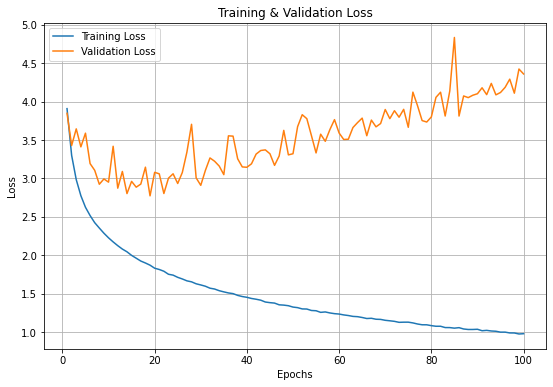

In [19]:
import matplotlib.pyplot as plt

epochs = range(1, len(hist_cifar100.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_cifar100.history['loss'])
plt.plot(epochs, hist_cifar100.history['val_loss'])
# plt.ylim(0, 0.4)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [21]:
loss, accuracy = cifar_100.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 4.3417 - accuracy: 0.2879
Loss = 4.34165
Accuracy = 0.28790


In [22]:
from keras.models import load_model
best_model = load_model('best_model100.h5')

loss, accuracy = best_model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 13s 3ms/step - loss: 2.7356 - accuracy: 0.3428
Loss = 2.73556
Accuracy = 0.34280


# 
# 
# 
# The End
# 
# 
# 